# Laboratorio 4
Joaquín Puente

José Mérida

# 1. Preparación del Conjunto de Datos
En esta sección estaremos importando los datos CIFAR-10, normalizándolos y mostrando ejemplos de sus imágenes.

## Carga CIFAR-10
Para cargar los datos, simplemente los importamos mediantes de Keras Datasets

In [1]:
# Importar el conjunto de datos CIFAR-10
from tensorflow.keras.datasets import cifar10
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Print información
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


# Ejemplo de Datos
print("Etiqueta:", y_train[0])
print("Forma de la imagen:", X_train[0].shape)
print(f"Valores de pixeles (parcial):\n", X_train[0][0][:5])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
Etiqueta: [6]
Forma de la imagen: (32, 32, 3)
Valores de pixeles (parcial):
 [[59 62 63]
 [43 46 45]
 [50 48 43]
 [68 54 42]
 [98 73 52]]


Como podemos observar en el output, el conjunto de datos consta de 60,000 datos que son imágenes de 32x32 e utilizan 3 canales RGB con valores entre 0 y 255.

## Normalización de Datos
Para normalizar los datos, podemos simplemente dividir dentro de 255 al saber que el conjunto de datos contiene valores RGB entre 0 y 255.

In [2]:
# Normalización de Datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Ejemplo de Datos
print("Etiqueta:", y_train[0])
print("Forma de la imagen:", X_train[0].shape)
print(f"Valores de pixeles (parcial):\n", X_train[0][0][:5])

Etiqueta: [6]
Forma de la imagen: (32, 32, 3)
Valores de pixeles (parcial):
 [[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]
 [0.26666667 0.21176471 0.16470588]
 [0.38431373 0.28627451 0.20392157]]


Al tener los datos normalizados, tenemos las dimensiones del dataset original y ahora los 3 canales RGB contienen valores de 0-1 en vez de 0-255.

## Ejemplos de Imágenes y sus Etiquetas
Al investigar sobre el conjunto de datos, encontramos las etiquetas que se utilizan para cada una de las imágenes. Entonces podemos simplemente buscar una imagen correspondiente a cada etiqueta dentro del set de datos para mostrar ejemplos y graficarlos con Matplotlib.

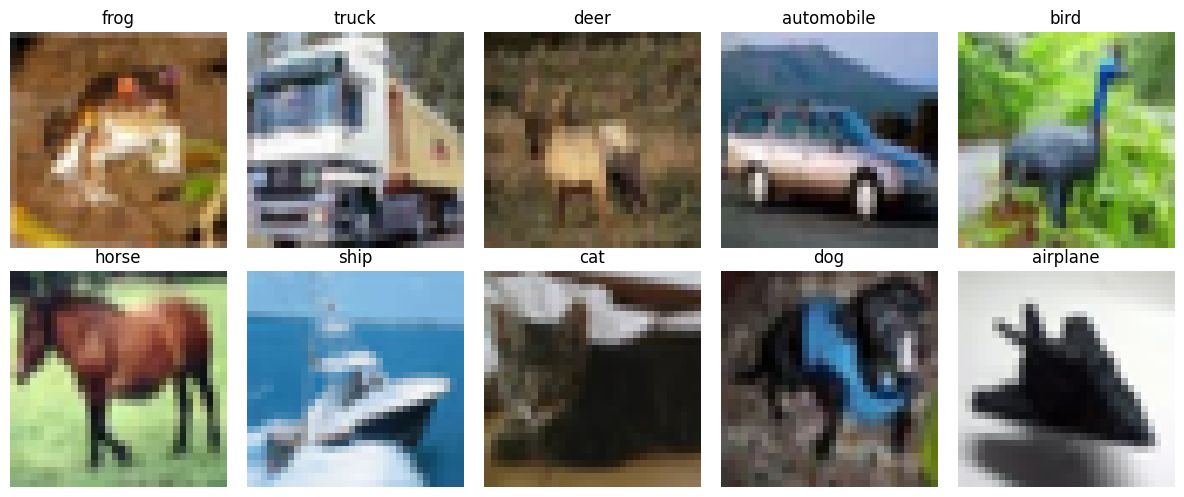

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Etiquetas de CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Búsqueda de una imagen por etiqueta
found = set()
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i in range(len(X_train)):
    label = y_train[i][0]
    if label not in found:
        row = len(found) // 5
        col = len(found) % 5
        axes[row, col].imshow(X_train[i])
        axes[row, col].set_title(class_names[label])
        axes[row, col].axis('off')
        found.add(label)
    if len(found) == 10:
        break

plt.tight_layout()
plt.show()

Este conjunto de datos contiene imágenes de 32x32 pixeles correspondientes a los siguientes animales y objetos:

- Rana
- Camión
- Venado
- Carro
- Pájaro
- Caballo
- Barco
- Gato
- Perro
- Avión

Al ver algunos ejemplos, nos podemos dar cuenta que las imágenes tienen una variedad de colores y fondos. Por lo cual puede llegar a ser difícil clasificarlas. Además, al tener un tamaño reducido se pierden algunos de los detalles finos y algunas imágenes pueden ser difíciles de identificar como el ejemplo del venado.

# 2. Modelo Base ANN
En esta sección estaremos implementando una red neuronal totalmente conectada (ANN) de clasificación de imágenes del conjunto con la finalidad de tener un modelo de referencia.

## Creación del Modelo
La arquitectura del modelo a implementar es la siguiente
- Flatten de imagen 32x32x32 -> 3072
- Primera capa densa de 128 neuronas con activación ReLU
- Segunda capa densa de 64 neuronas con activación ReLU
- Capa de salida softmax

In [4]:
import tensorflow as tf
import time

# Creación del Modelo
model_ANN = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),  # 32x32x3 = 3072
    tf.keras.layers.Dense(128, activation='relu'),     # Primera capa escondida
    tf.keras.layers.Dense(64, activation='relu'),      # Segunda capa escondida
    tf.keras.layers.Dense(10, activation='softmax')    # Capa de salida softmax
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compilación del Modelo
Para compilar el modelo estaremos utilizando Adam, el optimizador "estándar" ya que se busca un modelo simple de baseline.

In [5]:
model_ANN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento del Modelo
Para el entrenamiento del modelo vamos a documentar el tiempo tomado, al igual que utilizar el 20% del conjunto de datos como datos de validación. Adicionalmente, vamos a crear diccionarios para poder mantener registro del desempeño de cada uno de los modelos y realizar un análisis comparativo en los incisos finales.

In [6]:
# Datos de tiempos de entrenamiento
training_times = {}

# Datos de historiales de entrenamiento
histories = {}

start_time = time.time()

# Entrenamiento del modelo con 20% del conjunto como validación
histories['ANN'] = model_ANN.fit(X_train, y_train, epochs=10, validation_split=0.2)

end_time = time.time()
training_time = end_time - start_time

training_times['ANN'] = training_time

print(f"\nTiempo de entrenamiento: {training_time:.2f} segundos")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2764 - loss: 2.0019 - val_accuracy: 0.3443 - val_loss: 1.8268
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3730 - loss: 1.7399 - val_accuracy: 0.3748 - val_loss: 1.7635
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4040 - loss: 1.6592 - val_accuracy: 0.3987 - val_loss: 1.6888
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4176 - loss: 1.6134 - val_accuracy: 0.4265 - val_loss: 1.6086
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4391 - loss: 1.5728 - val_accuracy: 0.4218 - val_loss: 1.6349
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4436 - loss: 1.5447 - val_accuracy: 0.4432 - val_loss: 1.5767
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4592 - loss: 1.5162 - val_accuracy: 0.4443 - val_loss: 1.5842
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4657 - loss: 1.5052 - 

# 3. Implementación CNN
En esta sección estaremos implementando CNNs, incluyendo un modelo base al igual que experimentación con diferentes hiperparámetros.

## Modelo Baseline
Este modelo sigue la siguiente arquitectura, y funciona como modelo base para las CNNs:

- Capa Conv2D con 32 filtros, kernel 3x3 y activación ReLU
- Cada Conv2D con 64 filtros, kernel 3x3 y activación ReLU
- Capa MaxPooling2D con pool size 2x2
- Capa Flatten para transformar la imagen a vectores 1D para las capas densas
- Capa Densa de 64 neuronas con activación ReLU
- Capa de salida con softmax

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import time

# Construcción del Modelo
model_CNN = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilación del Modelo
model_CNN.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Entrenamiento del Modelo
start_time = time.time()

histories['CNN'] = model_CNN.fit(X_train, y_train,
                            epochs=10,
                            validation_split=0.2)

end_time = time.time()

training_time = end_time - start_time

training_times['CNN'] = training_time

print(f"\nTiempo de entrenamiento CNN: {training_time:.2f} segundos")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3919 - loss: 1.6728 - val_accuracy: 0.6030 - val_loss: 1.1307
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6320 - loss: 1.0361 - val_accuracy: 0.6417 - val_loss: 1.0100
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6982 - loss: 0.8588 - val_accuracy: 0.6674 - val_loss: 0.9589
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7500 - loss: 0.7199 - val_accuracy: 0.6641 - val_loss: 0.9902
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7934 - loss: 0.6005 - val_accuracy: 0.6755 - val_loss: 0.9906
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8324 - loss: 0.4824 - val_accuracy: 0.6695 - val_loss: 1.0846
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8659 - loss: 0.3927 - val_accuracy: 0.6723 - val_loss: 1.1229
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8972 - loss: 0.3010

## Modelo Dropout
Para este modelo buscamos agregar Dropout entre diferentes capas para mejorar la capacidad de generalización del modelo y comparar su rendimiento con el modelo baseline.

- Capa Conv2D con 32 filtros, kernel 3x3 y activación ReLU
- Capa Dropout con tasa 0.25 para regularización
- Capa Conv2D con 64 filtros, kernel 3x3 y activación ReLU
- Capa MaxPooling2D con pool size 2x2
- Capa Dropout con tasa 0.25 para regularización
- Capa Flatten para transformar la imagen a vectores 1D para las capas densas
- Capa Densa de 64 neuronas con activación ReLU
- Capa Dropout con tasa 0.5 antes de la capa de salida para evitar sobreajuste
- Capa de salida con softmax para clasificación en 10 clases

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import time

# Construcción del Modelo con Dropout
model_CNN_Dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Dropout(0.25),                       # Dropout después de la primera conv para regularización
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),                       # Dropout después del pooling para evitar sobreajuste
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),                       # Dropout fuerte antes de la capa de salida
    Dense(10, activation='softmax')
])

# Compilación del Modelo
model_CNN_Dropout.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

# Entrenamiento del Modelo
start_time = time.time()

histories['CNN_Dropout'] = model_CNN_Dropout.fit(X_train, y_train,
                                                epochs=10,
                                                validation_split=0.2)

end_time = time.time()
training_time = end_time - start_time
training_times['CNN_Dropout'] = training_time

print(f"\nTiempo de entrenamiento CNN con Dropout: {training_time:.2f} segundos")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2495 - loss: 2.0042 - val_accuracy: 0.4746 - val_loss: 1.4935
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4017 - loss: 1.5921 - val_accuracy: 0.5546 - val_loss: 1.3317
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4555 - loss: 1.4633 - val_accuracy: 0.5789 - val_loss: 1.2201
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4835 - loss: 1.3971 - val_accuracy: 0.5940 - val_loss: 1.2071
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5086 - loss: 1.3284 - val_accuracy: 0.6151 - val_loss: 1.1188
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5186 - loss: 1.2998 - val_accuracy: 0.6316 - val_loss: 1.0880
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5337 - loss: 1.2629 - val_accuracy: 0.6290 - val_loss: 1.0932
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5420 - loss: 1.233

# 4. Evaluación y Comparación

## Gráficas de Exactitud y Pérdida

## Evaluaciones en el Conjunto de Prueba

## Matrices de Confusión y Predicciones Erróneas

# 5. Reflexión Crítica